Le but de ce projet est d’analyser des données single-cell RNA-seq pour identifier differents groupes de cellules et observer leurs profils d’expression génique avec des outils bioinformatiques.

In [13]:

import scanpy as sc
import matplotlib.pyplot as plt


adata = sc.datasets.pbmc3k()


print("Nombre de cellules et gènes :", adata.shape)

Nombre de cellules et gènes : (2700, 32738)


In [14]:

sc.pp.filter_cells(adata, min_genes=200)

sc.pp.filter_genes(adata, min_cells=3)

print("Après filtrage :", adata.shape)

Après filtrage : (2700, 13714)


In [15]:

sc.pp.normalize_total(adata, target_sum=10000)


sc.pp.log1p(adata)

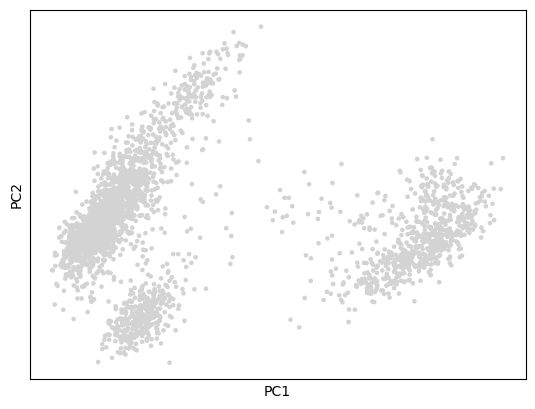

In [16]:

sc.pp.pca(adata)


sc.pl.pca(adata)

J’observe que les cellules sont réparties en plusieurs zones sur ce graphique , parce qu’il existe une variabilité dans l’expression des gènes entre les cellules. J’en déduis que les cellules ne sont pas toutes identiques, car certaines expriment des gènes différents.

In [25]:

sc.pp.neighbors(adata)


sc.tl.leiden(adata)

/var/folders/y4/131d089n69q7px5pjl6r6jz80000gn/T/ipykernel_31178/445710482.py:5: FutureWarning: The `igraph` implementation of leiden clustering is *orders of magnitude faster*. Set the flavor argument to (and install if needed) 'igraph' to use it.
In the future, the default backend for leiden will be igraph instead of leidenalg. To achieve the future defaults please pass: `flavor='igraph'` and `n_iterations=2`. `directed` must also be `False` to work with igraph’s implementation.
  sc.tl.leiden(adata)


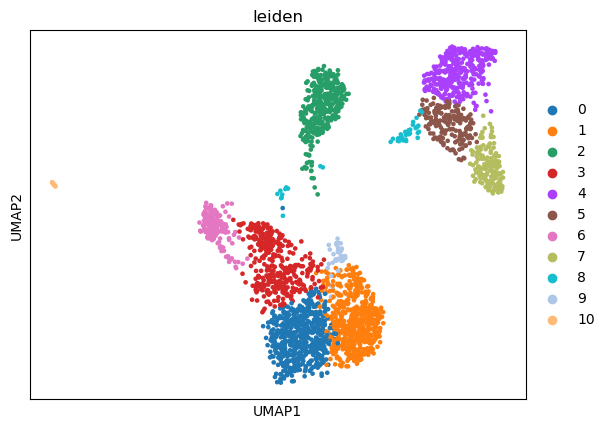

In [18]:
sc.tl.umap(adata)

sc.pl.umap(adata, color="leiden")

Sur le graphique UMAP, on voit 10 clusters de cellules séparés. Cela montre que les cellules ne sont pas toutes identiques, car elles ont des profils d’expression génique differents. Le cluster 0 semble contenir plus de cellules que les autres, ce qui peut indiquer un type cellulaire plus présent dans l’échantillon.

In [19]:
adata.obs.head()

,n_genes,leiden
index,,
AAACATACAACCAC-1,781,3
AAACATTGAGCTAC-1,1352,2
AAACATTGATCAGC-1,1131,0
AAACCGTGCTTCCG-1,960,5
AAACCGTGTATGCG-1,522,6


In [20]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

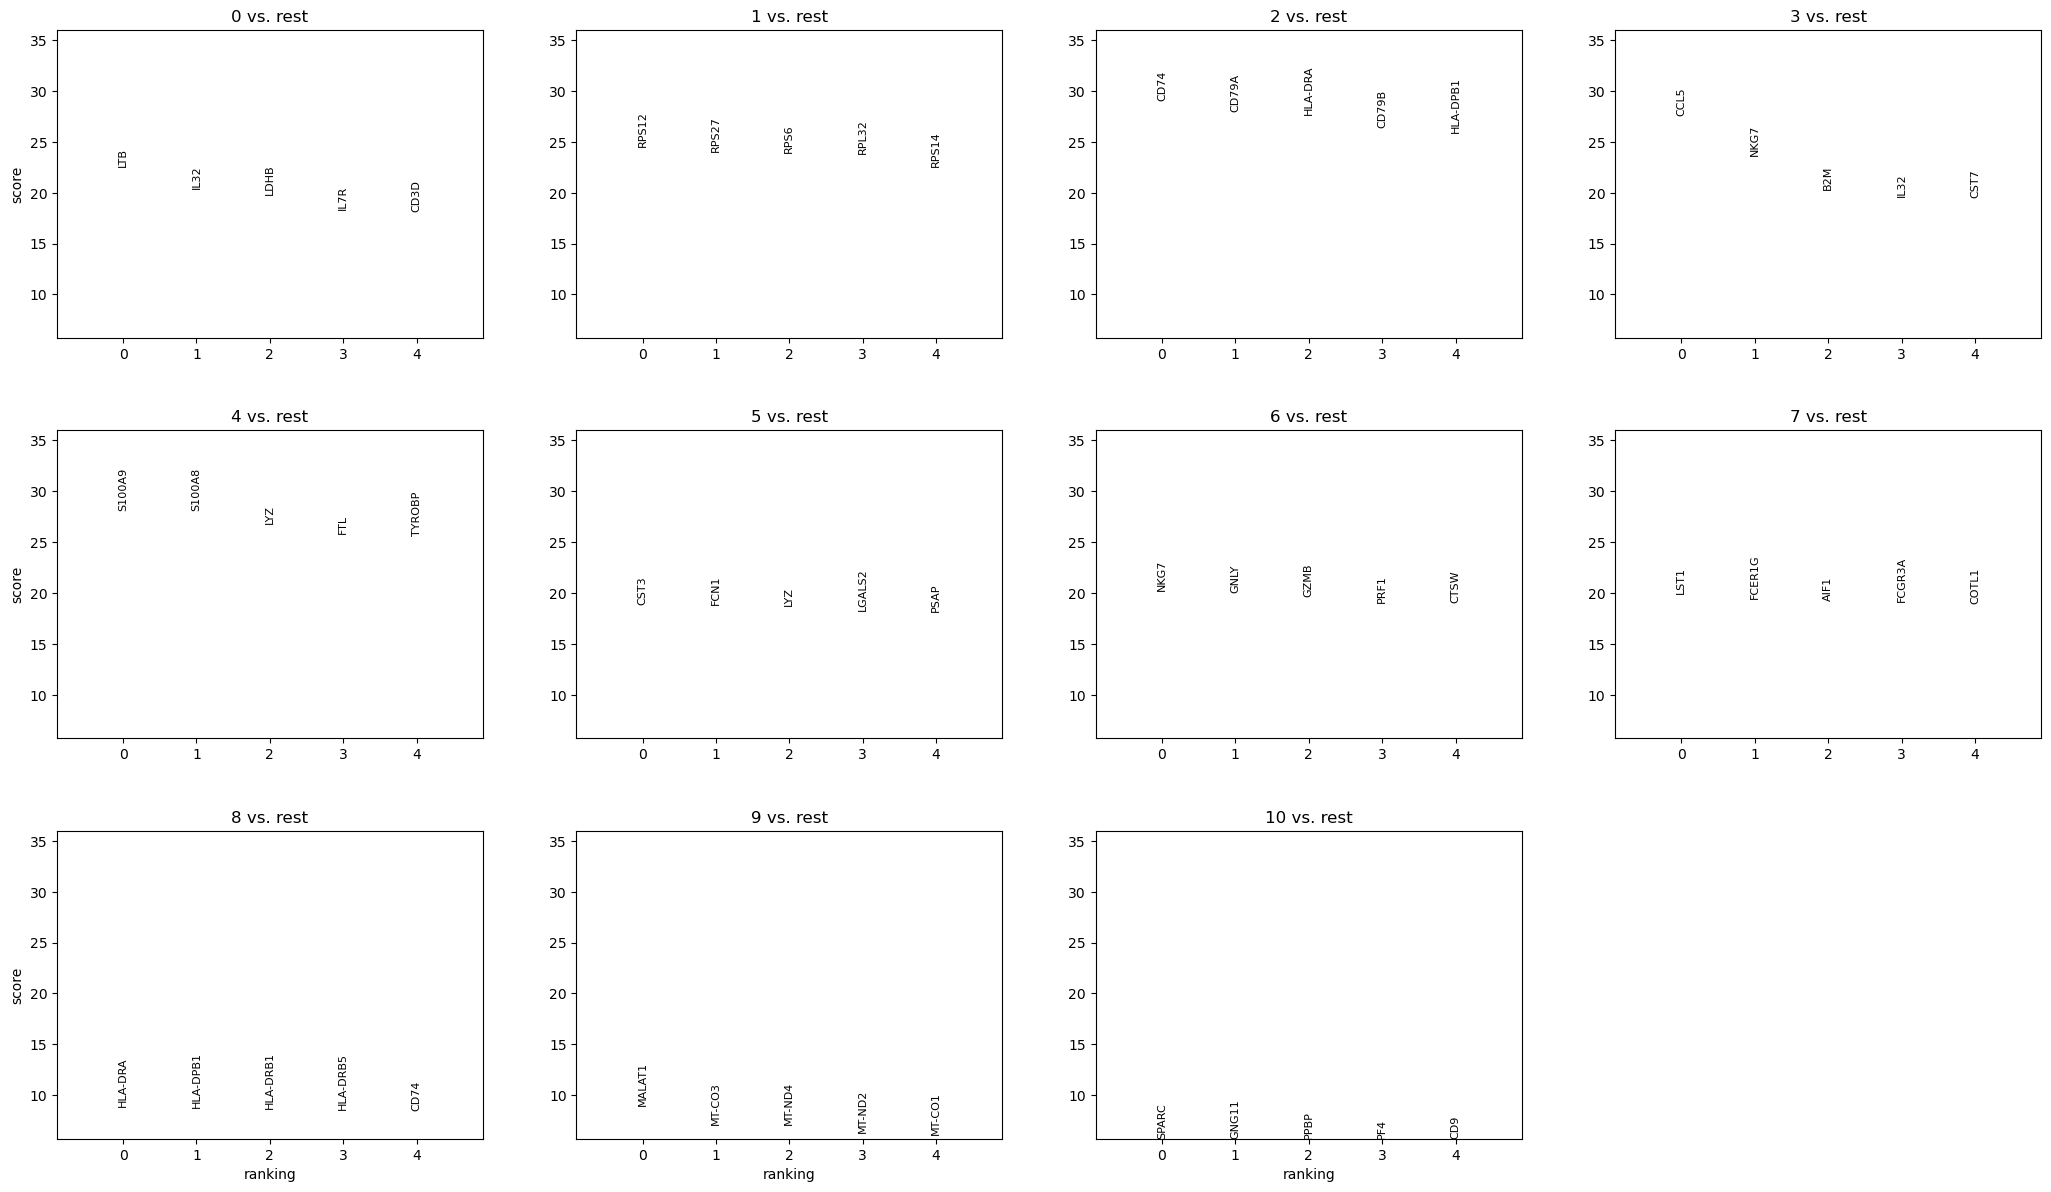

In [21]:
sc.pl.rank_genes_groups(adata, n_genes=5)

In [23]:
import pandas as pd

markers = pd.DataFrame(adata.uns['rank_genes_groups']['names'])

print(markers.head())

      0      1         2     3       4       5     6       7         8  \
0   LTB  RPS12      CD74  CCL5  S100A9    CST3  NKG7    LST1   HLA-DRA   
1  IL32  RPS27     CD79A  NKG7  S100A8    FCN1  GNLY  FCER1G  HLA-DPB1   
2  LDHB   RPS6   HLA-DRA   B2M     LYZ     LYZ  GZMB    AIF1  HLA-DRB1   
3  IL7R  RPL32     CD79B  IL32     FTL  LGALS2  PRF1  FCGR3A  HLA-DRB5   
4  CD3D  RPS14  HLA-DPB1  CST7  TYROBP    PSAP  CTSW   COTL1      CD74   

        9     10  
0  MALAT1  SPARC  
1  MT-CO3  GNG11  
2  MT-ND4   PPBP  
3  MT-ND2    PF4  
4  MT-CO1    CD9  


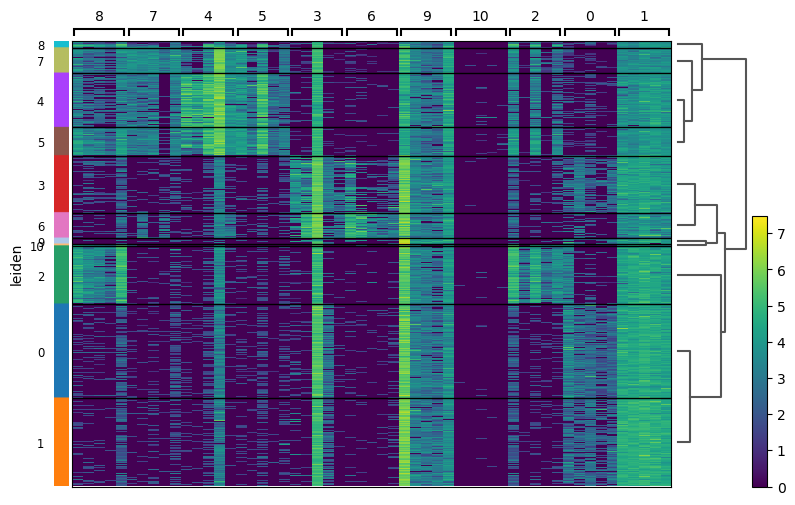

In [26]:
sc.pl.rank_genes_groups_heatmap(
    adata,
    n_genes=5,
    groupby="leiden",
    cmap="viridis"
)

Sur la heatmap, on peut voir que l’intensité des couleurs varie selon les clusters, ce qui montre que certains gènes sont plus exprimés dans les différents groupes de cellules que dans d’autres. Cette différence d’expression s’explique par le fait que chaque groupe de cellules possède une activité génétique différente.

On remarque également que certains gènes sont principalement associés à un seul cluster, car leur expression est plus élevée dans ce groupe que dans les autres. Cela permet de distinguer les différents clusters et indique que ces gènes peuvent servir de marqueurs pour identifier des populations cellulaires spécifiques.

La répartition des couleurs met en évidence plusieurs profils d’expression génique, ce qui signifie que les cellules n’ont pas toutes les mêmes caractéristiques moléculaires. Cette variation confirme l’existence de plusieurs populations cellulaires, chacune ayant un rôle biologique différent.